In [ ]:

from google.colab import files


uploaded = files.upload()

Saving cancer_data.csv to cancer_data.csv
Saving cancer_data_2.csv to cancer_data_2.csv


In [ ]:
import pandas as pd
import io

data= pd.read_csv(io.BytesIO(uploaded['cancer_data.csv']))
print(data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [ ]:
import pandas as pd
import io

data2= pd.read_csv(io.BytesIO(uploaded['cancer_data_2.csv']))

print(data2)

    patient_id  age  gender        bmi  smoking  exercise  fruit  veg  cancer
0            1   61       0  20.797214      2.0         0      1    2       0
1            2   68       1  27.300000      0.0         0      0    1       0
2            3   62       1  22.183096      0.0         0      1    3       0
3            4   61       1  35.268460      2.0         0      2    4       0
4            5   58       1  22.673343      1.0         0      3    1       0
..         ...  ...     ...        ...      ...       ...    ...  ...     ...
61          62   60       0  25.091993      2.0         2      0    3       0
62          63   70       0  21.933289      0.0         2      0    0       0
63          64   68       1  27.300000      0.0         2      1    9       0
64          65   69       1  27.365738      2.0         2      2    9       0
65          66   46       0  25.945921      NaN         2      1    9       0

[66 rows x 9 columns]


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Confusion Matrix:
[[106   2]
 [  4  59]]


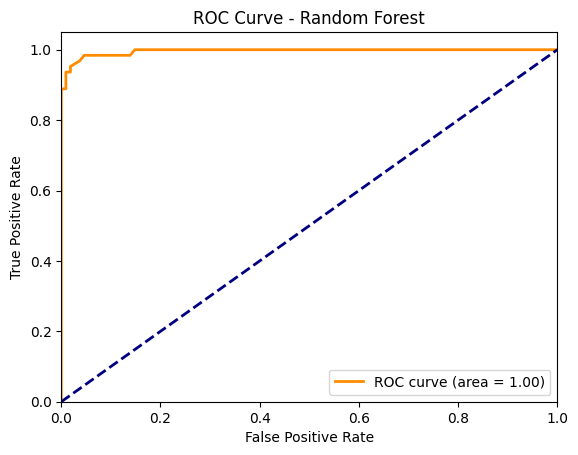

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       108
           1       0.68      0.41      0.51        63

    accuracy                           0.71       171
   macro avg       0.70      0.65      0.66       171
weighted avg       0.71      0.71      0.69       171

Confusion Matrix:
[[96 12]
 [37 26]]


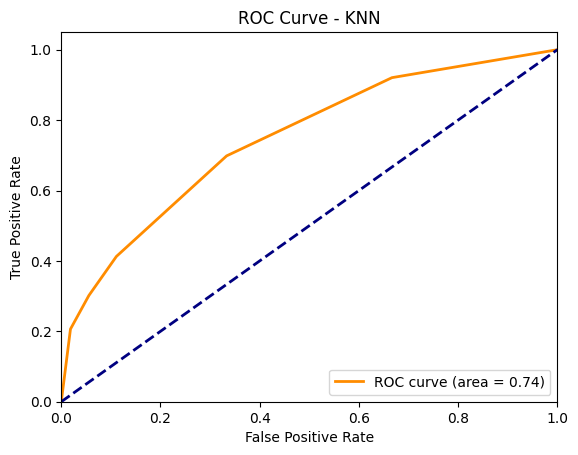

Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       108
           1       0.50      0.02      0.03        63

    accuracy                           0.63       171
   macro avg       0.57      0.50      0.40       171
weighted avg       0.58      0.63      0.50       171

Confusion Matrix:
[[107   1]
 [ 62   1]]


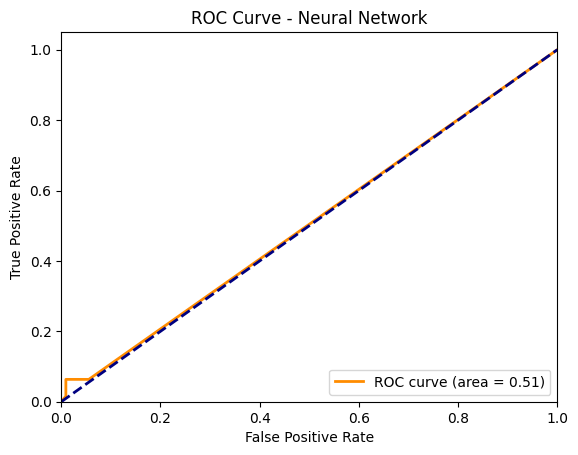

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       108
           1       0.00      0.00      0.00        63

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171

Confusion Matrix:
[[108   0]
 [ 63   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


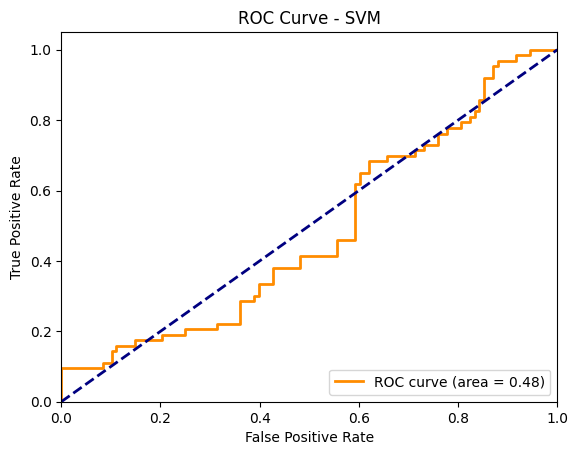

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.64      0.99      0.78       108
           1       0.67      0.03      0.06        63

    accuracy                           0.64       171
   macro avg       0.65      0.51      0.42       171
weighted avg       0.65      0.64      0.51       171

Confusion Matrix:
[[107   1]
 [ 61   2]]


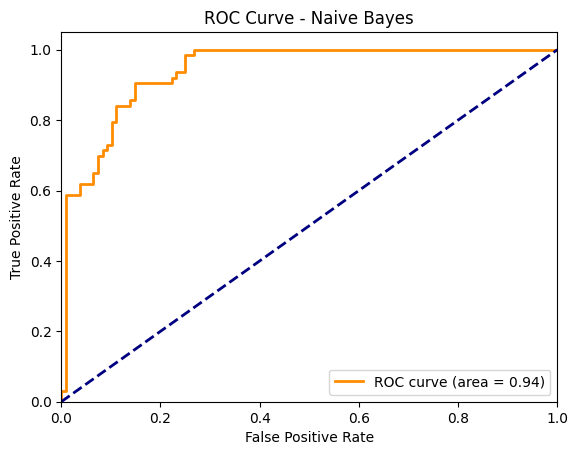

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE
from mlxtend.classifier import StackingClassifier



# Data cleaning
data.drop(data.columns[[-1]], axis=1, inplace=True)  # Drop the last column
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # Map diagnosis to binary values

# Data preprocessing
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# PCA (reduces the dimensions)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# LDA (non-labeled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Machine Learning Models
models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()



In [ ]:


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_pca, y_train)

def predict_diagnosis(new_data):
    new_data_scaled = scaler.transform([new_data])  # Scale the new data
    new_data_pca = pca.transform(new_data_scaled)   # Apply PCA transformation
    prediction = random_forest_model.predict(new_data_pca)
    diagnosis = 'M' if prediction[0] == 1 else 'B'
    return diagnosis

In [ ]:




# Then you can predict with new data as shown
example_new_data = [17.99,  # radius_mean
    10.38,  # texture_mean
    122.8,  # perimeter_mean
    1001.0,  # area_mean
    0.1184,  # smoothness_mean
    0.2776,  # compactness_mean
    0.3001,  # concavity_mean
    0.1471,  # concave points_mean
    0.2419,  # symmetry_mean
    0.07871,  # fractal_dimension_mean
    # Assuming these are also part of your dataset, add the 'se' (standard error) features:
    1.095,  # radius_se
    0.9053,  # texture_se
    8.589,  # perimeter_se
    153.4,  # area_se
    0.006399,  # smoothness_se
    0.04904,  # compactness_se
    0.05373,  # concavity_se
    0.01587,  # concave points_se
    0.03003,  # symmetry_se
    0.006193,  # fractal_dimension_se
    # And the 'worst' or largest values of these measurements:
    25.38,  # radius_worst
    17.33,  # texture_worst
    184.6,  # perimeter_worst
    2019,  # area_worst
    0.1622,  # smoothness_worst
    0.6656,  # compactness_worst
    0.7119,  # concavity_worst
    0.2654,  # concave points_worst
    0.4601,  # symmetry_worst
    0.1189 , # fractal_dimension_worst
    0.01
                    ]  # Replace with actual values
prediction = predict_diagnosis(example_new_data)
print("The prediction for the new data is:", prediction)


The prediction for the new data is: B


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [ ]:
# Impute missing values with the mean
data2 = data2.fillna(data2.mean())

# Alternatively, you can drop rows with missing values
data2 = data2.dropna()

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



# Separate features and target
features = data2.drop("cancer", axis=1)
target = data2["cancer"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train different classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on test data
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)

    # Print results
    print(f"Model: {name}, Accuracy: {accuracy:.2f}")

Model: Logistic Regression, Accuracy: 0.86
Model: Decision Tree, Accuracy: 0.71
Model: Random Forest, Accuracy: 0.86
Model: SVM, Accuracy: 0.86


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.svm import SVC

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


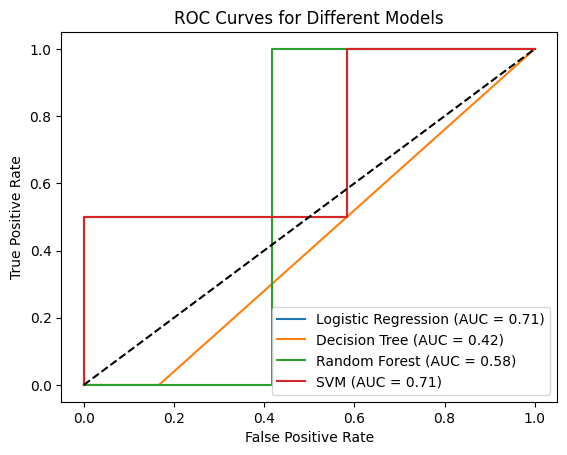

In [ ]:
# Train different classification models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on test data
    predictions = model.predict(X_test)

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot baseline
plt.plot([0, 1], [0, 1], "k--")

# Label axes and show plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels: [1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1
 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1]
Cluster centers: [[72.5         0.57692308 24.74226098  1.11538462  0.96153846  0.80769231
   3.11538462]
 [53.55        0.45       23.87626524  0.79807692  1.025       1.15
   2.9       ]]


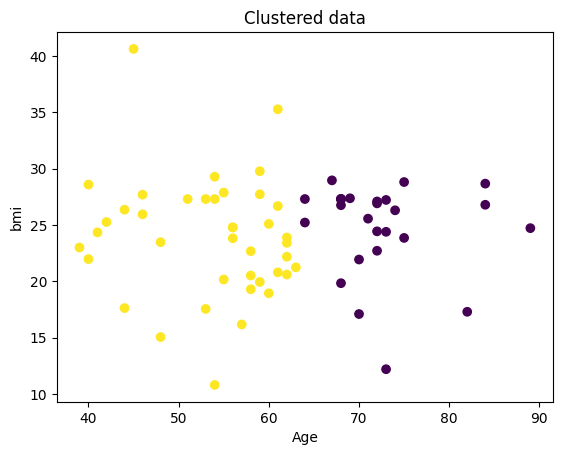

In [ ]:
from sklearn.cluster import KMeans

# Separate features and target
features = data2.drop("cancer", axis=1)

# Choose the desired number of clusters
num_clusters = 2

# Create a KMeans model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the data
kmeans.fit(features)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Print the cluster labels and centers
print("Cluster labels:", cluster_labels)
print("Cluster centers:", cluster_centers)

# Visualize the clusters (optional)
# Visualize the clusters (optional)
plt.scatter(features["age"], features["bmi"], c=cluster_labels)
plt.xlabel("Age")
plt.ylabel("bmi")
plt.title("Clustered data")
plt.show()

In [ ]:
# Calculate the accuracy of the clusters in predicting the target variable
cluster_accuracy = {}
for cluster in range(num_clusters):
    cluster_accuracy[cluster] = sum(target[cluster_labels == cluster] == cluster_labels[cluster_labels == cluster]) / len(cluster_labels[cluster_labels == cluster])

# Print the accuracy of the clusters in predicting the target variable
for cluster, accuracy in cluster_accuracy.items():
    print(f"Cluster {cluster}: {accuracy}")

Cluster 0: 0.6153846153846154
Cluster 1: 0.125
